In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fontTools.ufoLib import FEATURES_FILENAME
from matplotlib import style

from sklearn.metrics import accuracy_score

style.use('ggplot')
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,root_mean_squared_error
import xgboost as xbg

import warnings
warnings.filterwarnings('ignore')


XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/gyanapradhan/PyCharmMiscProject/.venv/lib/python3.13/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: '@rpath/libomp.dylib'\n  Referenced from: '/Users/gyanapradhan/PyCharmMiscProject/.venv/lib/python3.13/site-packages/xgboost/lib/libxgboost.dylib'\n  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)"]


In [3]:
import struct
print (struct.calcsize('P')*8)


64


In [5]:
import platform
print(platform.architecture())


('64bit', 'Mach-O')


In [119]:
base_path = "/Users/gyanapradhan/Desktop/Datasets/"
df_pd= pd.read_csv(base_path + "patients.csv")


In [120]:
display(df_pd.head(4))

,patient_id,name,age,arrival_date,departure_date,service,satisfaction
0,PAT-09484753,Richard Rodriguez,24,2025-03-16,2025-03-22,surgery,61
1,PAT-f0644084,Shannon Walker,6,2025-12-13,2025-12-14,surgery,83
2,PAT-ac6162e4,Julia Torres,24,2025-06-29,2025-07-05,general_medicine,83
3,PAT-3dda2bb5,Crystal Johnson,32,2025-10-12,2025-10-23,emergency,81


In [86]:
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   patient_id      1000 non-null   object
 1   name            1000 non-null   object
 2   age             1000 non-null   int64 
 3   arrival_date    1000 non-null   object
 4   departure_date  1000 non-null   object
 5   service         1000 non-null   object
 6   satisfaction    1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [121]:
df_pd.select_dtypes('object').describe().T


,count,unique,top,freq
patient_id,1000,1000,PAT-09484753,1
name,1000,993,Mary Miller,2
arrival_date,1000,344,2025-01-19,9
departure_date,1000,337,2025-10-16,8
service,1000,4,emergency,263


In [122]:
df_pd['arrival_date'] = pd.to_datetime(df_pd['arrival_date'])
df_pd['departure_date'] = pd.to_datetime(df_pd['departure_date'])
df_pd['Duration_stay']   =(df_pd['departure_date']-df_pd['arrival_date']).dt.days
df_pd['arrival_month'] = pd.to_datetime(df_pd['arrival_date']).dt.month

In [123]:
df_pd.head(3)


,patient_id,name,age,arrival_date,departure_date,service,satisfaction,Duration_stay,arrival_month
0,PAT-09484753,Richard Rodriguez,24,2025-03-16,2025-03-22,surgery,61,6,3
1,PAT-f0644084,Shannon Walker,6,2025-12-13,2025-12-14,surgery,83,1,12
2,PAT-ac6162e4,Julia Torres,24,2025-06-29,2025-07-05,general_medicine,83,6,6


In [124]:
df_pd.isnull().sum()

patient_id        0
name              0
age               0
arrival_date      0
departure_date    0
service           0
satisfaction      0
Duration_stay     0
arrival_month     0
dtype: int64

In [126]:



#x= df_pd.drop(columns=["service"])
y = df_pd['satisfaction']
y



0      61
1      83
2      83
3      81
4      76
       ..
995    91
996    99
997    69
998    61
999    83
Name: satisfaction, Length: 1000, dtype: int64

In [118]:
df_pd

,service,Duration_stay,arrival_month,service_encoded
0,surgery,6,3,3
1,surgery,1,12,3
2,general_medicine,6,6,2
3,emergency,11,10,1
4,ICU,7,2,0
...,...,...,...,...
995,emergency,2,12,1
996,emergency,12,11,1
997,ICU,9,12,0
998,ICU,12,2,0


In [127]:

df_pd.drop(columns=['patient_id','name','age',"arrival_date","arrival_date","departure_date","satisfaction"],inplace=True  )


In [99]:
df_pd

,service,Duration_stay,arrival_month
0,surgery,6,3
1,surgery,1,12
2,general_medicine,6,6
3,emergency,11,10
4,ICU,7,2
...,...,...,...
995,emergency,2,12
996,emergency,12,11
997,ICU,9,12
998,ICU,12,2


In [128]:
categorical_features= ["service"]
numerical_features= ["age","arrival_month","Duration_stay"]

TypeError: tight_layout() takes 0 positional arguments but 1 was given

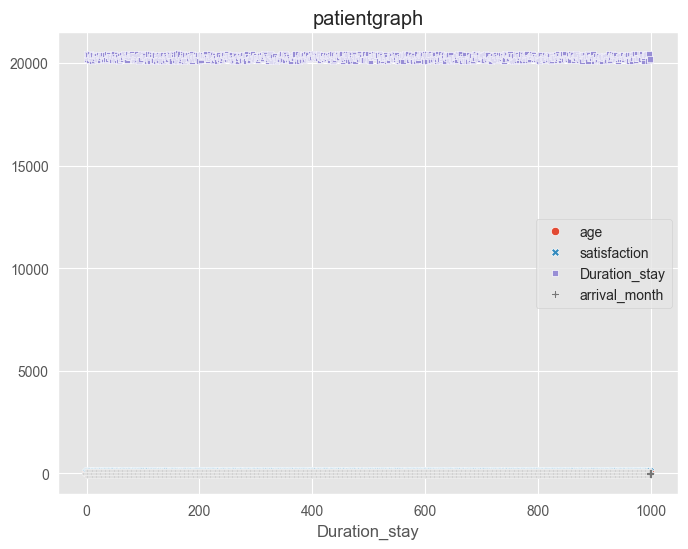

In [46]:
plt.figure(figsize=[8,6])
sns.scatterplot(df_pd)
plt.title("patientgraph")
plt.xlabel("Duration_stay")
plt.tight_layout("satisfaction")
plt.tight_layout()
plt.show()

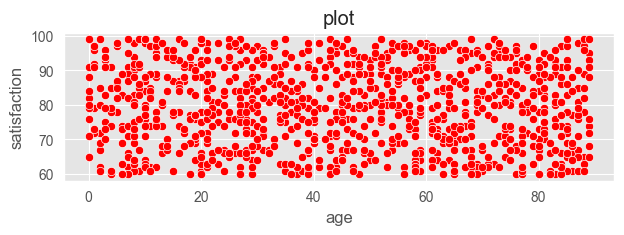

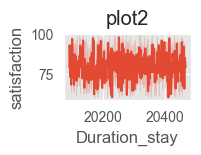

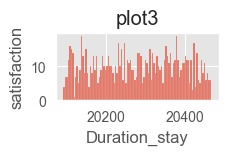

In [56]:
plt.figure(figsize=(12,8))
plt.subplot(4,2,5)
sns.scatterplot(df_pd,x= 'age', y='satisfaction', color="red")
plt.title("plot")
plt.xlabel("age")
plt.ylabel("satisfaction")
plt.tight_layout()
plt.show()


plt.subplot(4,4,5)
sns.lineplot(x=df_pd['Duration_stay'],y=df_pd['satisfaction'])
plt.title("plot2")
plt.xlabel("Duration_stay")
plt.ylabel("satisfaction")
plt.tight_layout()
plt.show()

plt.subplot(4,3,5)
sns.histplot(x=df_pd['Duration_stay'],bins=100)
plt.title("plot3")
plt.xlabel("Duration_stay")
plt.ylabel("satisfaction")
plt.tight_layout()
plt.show()


In [129]:
#pre processing
feature_model =LabelEncoder()
df_pd['service_encoded']=feature_model.fit_transform(df_pd['service'])




In [135]:
df_pd.drop(columns=['service'],inplace=True)

In [138]:
df_pd

,Duration_stay,arrival_month,service_encoded
0,6,3,3
1,1,12,3
2,6,6,2
3,11,10,1
4,7,2,0
...,...,...,...
995,2,12,1
996,12,11,1
997,9,12,0
998,12,2,0


In [142]:
#x=df_pd.filter(df_pd["Duration_stay", "arrival_month",'service_encoded'])
x=df_pd

In [147]:
x_test,x_train,y_test,y_train = train_test_split(x,y,test_size=0.2,random_state=42)
x_train

,Duration_stay,arrival_month,service_encoded
521,13,2,2
737,12,8,1
740,3,1,1
660,11,8,2
411,3,12,2
...,...,...,...
408,13,7,1
332,6,1,0
208,10,8,1
613,8,9,3


In [144]:
model = RandomForestRegressor(n_estimators=300,random_state=42,max_depth=12)
model.fit(x_train,y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,12
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [145]:
prediction= model.predict(x_test)
print(prediction)
print(y_test)

[73.34794444 84.285      82.67315079 84.2535     89.50322222 90.02983333
 67.00429654 75.81126984 84.33016667 83.04244444 88.38008682 82.33977381
 74.30378571 80.39866667 83.04244444 84.86398148 66.50967974 77.19603968
 84.73295238 77.04542857 78.05514683 79.19471549 73.97902034 84.24230952
 86.78841294 87.96601323 78.57622222 75.81728571 73.91166667 85.73743939
 78.59055556 69.60592072 87.03243651 65.50638889 81.57614141 73.26733333
 72.45610831 65.50638889 66.50967974 86.30955556 89.36794444 74.34416667
 85.3925457  87.35624327 81.37222222 86.60555556 85.9936918  84.86398148
 76.03701217 84.86398148 81.75982407 70.60083333 87.03983333 85.83517737
 81.34272222 76.22739562 92.59911111 76.39538889 89.61219577 87.03243651
 80.48277778 72.74444444 89.19055556 80.78433333 80.43522222 83.94692063
 87.66906878 72.92914141 86.56173004 67.27166667 76.16805556 82.52347908
 84.33016667 75.81542593 76.13152609 92.00311111 83.20327152 95.1275
 90.52055556 77.19603968 71.56986111 79.05908333 76.512

In [149]:
accurate = accuracy_score(y_test,prediction.round(0))
print(accurate)


0.03
